# Keras

    Keras เป็น deep learning framework ของ python ที่มีการใช้งานง่าย สะดวกสะบาย โดยมีข้อดีดังนี้
- สามารถใช้ได้ทั้ง CPU และ GPU ในการประมวลผล
- Library ง่ายต่อการใช้งาน
- มีฟังก์ชันพิ้นฐานสำหรับการทำ Deep learning เช่น convolution layer, pooling layer
- รองรับการทำงาน Network หลากลายรูปแบบ เช่น MiMO model, layer sharing, model sharing และอื่นๆ
    
      ซึ่งข้อดีทั้งหมดนั้นทำให้ keras สามารถทำงานเกี่ยวกับ Deep learning ได้อย่างง่ายและมีประสิทธิภาพอีทั้ง keras ยังใช้ tensorflow เป็นพื้นฐานทำให้มีประสิทธิภาพค่อนข้างสูงรวมทั้งทำให้ผู้ที่เคยใช้ tensorflow มาแล้วนั้นใข้งานง่ายขึ้น และkeras ยังเป็นopen source ทำให้สามารถใช้งานได้โดยไม่ต้องจ่ายค่า lisense 

# นำเข้า library

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.
/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/naii

# กำหนดค่าสำหรับการ train

In [8]:
batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# โหลดรูปdataset แล้วแยกเป็น ชุดสอนและชุดทดสอบ 

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# ปรับ scale รูปให้อยู่ในช่วง 0-255

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# กำหนดmodel

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# train 

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 50s 838us/step - loss: 0.1562 - accuracy: 0.9539 - val_loss: 0.0550 - val_accuracy: 0.9823
Test loss: 0.054966112835984675
Test accuracy: 0.9822999835014343


# ทดสอบการทำนายภาพ

In [15]:
import matplotlib.pyplot as plt

In [24]:
r=model.predict_classes(x_test)

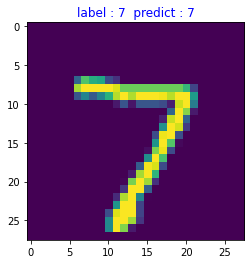

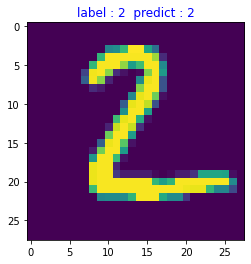

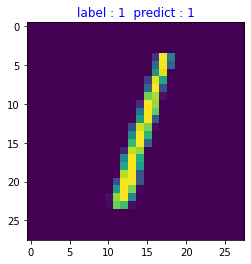

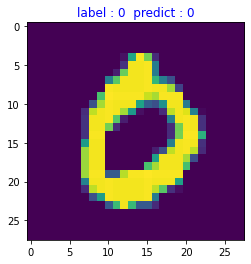

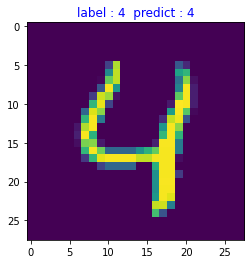

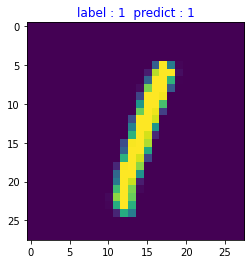

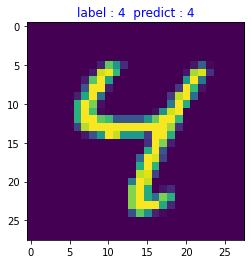

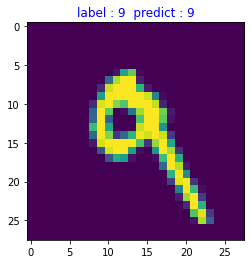

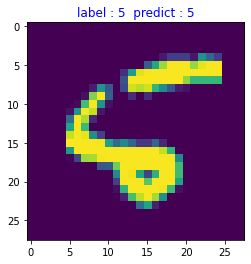

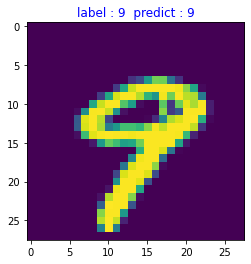

In [27]:
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28))
    l=list(y_test[i]).index(1.)
    text = "label : {}  predict : {}".format(l,r[i])
    if(l!=r[i]):
        plt.title(text,color='r')
    else:
        plt.title(text,color='b')
    plt.show()